# 6. Pandas Introduction

In the previous chapters, we have learned how to handle Numpy arrays that can be used to efficiently perform numerical calculations. Those arrays are however homogeneous structures i.e. they can only contain one type of data. Also, even if we have a single type of data, the different rows or columns of an array do not have labels, making it difficult to track what they contain. For such cases, we need a structure closer to a table as can be found in Excel, and these structures are implemented by the package Pandas.

But why can't we simply use Excel then? While Excel is practical to browse through data, it is very cumbersome to use to combine, re-arrange and thoroughly analyze data: code is hidden and difficult to share, there's no version control, it's difficult to automate tasks, the manual clicking around leads to mistakes etc.

In the next chapters, you will learn how to handle tabular data with Pandas, a Python package widely used in the scientific and data science areas. You will learn how to create and import tables, how to combine them, modify them, do statistical analysis on them and finally how to use them to easily create complex visualizations.

So that you see where this leads, we start with a short example of how Pandas can be used in a project. We look here at data provided openly by the Swiss National Science Foundation about grants attributed since 1975.

In [302]:
import numpy as np
import pandas as pd
import seaborn as sns

## 6.1 Importing data

Before anything, we need access to the data that can be found [here](https://opendata.swiss/de/dataset/p3-export-projects-people-and-publications). We can either manually download them and then use the path to read the data or directly use the url. The latter has the advantage that if you have an evolving source of data, these will always be up to date:

In [300]:
# local import
#projects = pd.read_csv('../Data/P3_GrantExport.csv',sep = ';')

# import from url
projects = pd.read_csv('http://p3.snf.ch/P3Export/P3_GrantExport.csv',sep = ';')

Then we can have a brief look at the table itself that Jupyter displays in a formated way and limit the view to the 5 first rows using ```head()```:

In [303]:
projects.head(5)

,Project Number,Project Number String,Project Title,Project Title English,Responsible Applicant,Funding Instrument,Funding Instrument Hierarchy,Institution,Institution Country,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords
0,1,1000-000001,Schlussband (Bd. VI) der Jacob Burckhardt-Biog...,NaN,Kaegi Werner,Project funding (Div. I-III),Project funding,NaN,NaN,Unassignable - NA,10302,Swiss history,Humanities and Social Sciences;Theology & reli...,10302,01.10.1975,30.09.1976,11619.00,NaN
1,4,1000-000004,Batterie de tests à l'usage des enseignants po...,NaN,Massarenti Léonard,Project funding (Div. I-III),Project funding,Faculté de Psychologie et des Sciences de l'Ed...,Switzerland,University of Geneva - GE,10104,Educational science and Pedagogy,"Humanities and Social Sciences;Psychology, edu...",10104,01.10.1975,30.09.1976,41022.00,NaN
2,5,1000-000005,Kritische Erstausgabe der 'Evidentiae contra D...,NaN,Kommission für das Corpus philosophorum medii ...,Project funding (Div. I-III),Project funding,Kommission für das Corpus philosophorum medii ...,Switzerland,"Non-profit organisations (libraries, museums, ...",10101,Philosophy,Humanities and Social Sciences;Linguistics and...,10101,01.03.1976,28.02.1985,79732.00,NaN
3,6,1000-000006,Katalog der datierten Handschriften in der Sch...,NaN,Burckhardt Max,Project funding (Div. I-III),Project funding,Abteilung Handschriften und Alte Drucke Univer...,Switzerland,University of Basel - BS,10302,Swiss history,Humanities and Social Sciences;Theology & reli...,10302,01.10.1975,30.09.1976,52627.00,NaN
4,7,1000-000007,Wissenschaftliche Mitarbeit am Thesaurus Lingu...,NaN,Schweiz. Thesauruskommission,Project funding (Div. I-III),Project funding,Schweiz. Thesauruskommission,Switzerland,"Non-profit organisations (libraries, museums, ...",10303,Ancient history and Classical studies,Humanities and Social Sciences;Theology & reli...,10303,01.01.1976,30.04.1978,120042.00,NaN


## 6.2 Exploring data

Pandas offers a variety of tools to compile information about data, and that compilation can be done very efficiently without the need for loops, conditionals etc.

For example we can quickly count how many times each University appear in that table. We just use the ```value_counts()``` method for that:

In [78]:
projects['University'].value_counts().head(10)

Institution abroad - IACH      13343
University of Zurich - ZH       8164
University of Geneva - GE       7380
ETH Zurich - ETHZ               7273
University of Berne - BE        6439
University of Basel - BS        5558
EPF Lausanne - EPFL             5173
University of Lausanne - LA     4940
Unassignable - NA               2642
University of Fribourg - FR     2535
Name: University, dtype: int64

Then we can very easily plot the resulting information, either using directly Pandas or a more advanced library like Seaborn, plotnine or Altair.

Here first with plain Pandas (using Matplotlib under the hood):

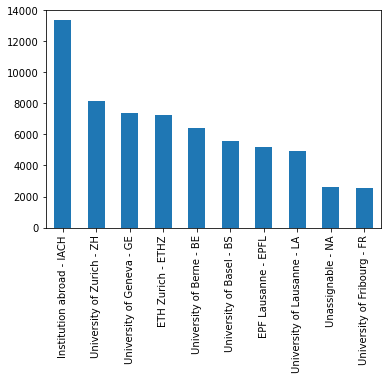

In [79]:
projects['University'].value_counts().head(10).plot(kind='bar')

## 6.3 Handling different data types

Unlike Numpy arrays, Pandas can handle a variety of different data types in a dataframe. For example it is very efficient at dealing with dates. We see that our table contains e.g. a ```Start Date```. We can turn this string into an actual date:

In [97]:
projects['start'] = pd.to_datetime(projects['Start Date'])
projects['year'] = projects.start.apply(lambda x: x.year)

In [98]:
projects.loc[0].start

Timestamp('1975-01-10 00:00:00')

In [99]:
projects.loc[0].year

1975.0

## 6.4 Data wrangling, aggregation and statistics

Pandas is very efficient at wrangling and aggregating data, i.e. grouping several elements of a table to calculate statistics on them. For example we first need here to convert the ```Approved Amount``` to a numeric value. Certain rows contain text (e.g. "not applicable") and we force the conversion:

In [122]:
projects['Approved Amount'] = pd.to_numeric(projects['Approved Amount'], errors = 'coerce')

Then we want to extract the type of filed without subfields e.g. "Humanities" instead of "Humanities and Social Sciences;Theology & religion". For that we can create a custom function and apply it to an entire column:

In [180]:
science_types = ['Humanities', 'Mathematics','Biology']
projects['Field'] = projects['Discipline Name Hierarchy'].apply(
    lambda el: next((y for y in [x for x in science_types if x in el] if y is not None),None) if not pd.isna(el) else el)
                                            

Then we group the data by discipline and year, and calculate the mean of each group:

In [188]:
aggregated = projects.groupby(['Institution Country', 'year','Field'], as_index=False).mean()

Finally we can use Seaborn to plot the data by "Field" using just keywords to indicate what the axes and colours should mean (following some principles of the grammar of graphics):

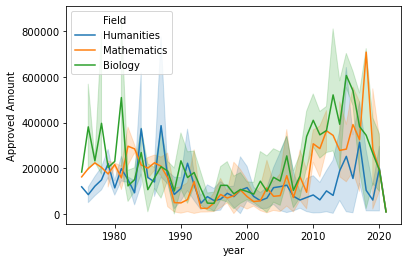

In [189]:
sns.lineplot(data = aggregated, x = 'year', y='Approved Amount', hue='Field');

Note that here, axis labelling, colorouring, legend, interval of confidence have been done automatically based on the content of the dataframe.

We see a drastic augmentation around 2010: let's have a closer look. We can here again group data by year and funding type and calculate the total funding:

In [289]:
grouped = projects.groupby(['year','Funding Instrument Hierarchy']).agg(
    total_sum=pd.NamedAgg(column='Approved Amount', aggfunc='sum')).reset_index()

In [290]:
grouped

,year,Funding Instrument Hierarchy,total_sum
0,1975.0,Project funding,32124534.0
1,1975.0,Science communication,44600.0
2,1976.0,Programmes;National Research Programmes (NRPs),268812.0
3,1976.0,Project funding,96620284.0
4,1976.0,Science communication,126939.0
...,...,...,...
378,2020.0,Programmes;r4d (Swiss Programme for Research o...,195910.0
379,2020.0,Project funding,182529824.0
380,2020.0,Project funding;Project funding (special),19239681.0
381,2020.0,Science communication,3416040.0


Now, for each year we keep only the 5 largest funding types to be able to plot them:

In [295]:
group_sorted = grouped.groupby('year',as_index=False).apply(lambda x: (x.groupby('Funding Instrument Hierarchy')
                                      .sum()
                                      .sort_values('total_sum', ascending=False))
                                     .head(5)).reset_index()

Finally, we only keep year in the 2000's:

In [297]:
instruments_by_year = group_sorted[(group_sorted.year > 2005) & (group_sorted.year < 2012)]

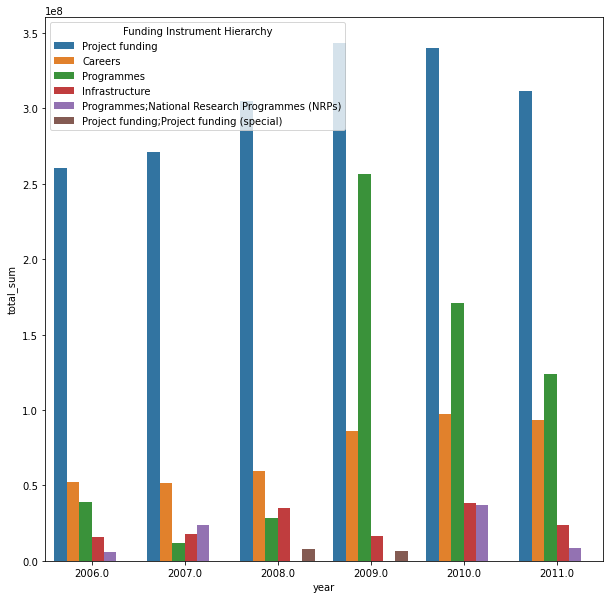

In [299]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.barplot(data=instruments_by_year,
            x='year', y='total_sum', hue='Funding Instrument Hierarchy')

We see that the main change, is the sudden increase in funding for national research programs.